# Load Data

In [11]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df = joblib.load("../../data/processed/deepfashion_train.joblib")
validation_df = joblib.load("../../data/processed/deepfashion_validation.joblib")
df = pd.concat([train_df, validation_df])

Lets track if images contain more then one item:

In [3]:
single_item = df.groupby(by="image").count()["pair_id"]==1
single_item = single_item.rename("single_item")
extended_df = df.merge(single_item, on="image", how="inner")

# Explore Data

## Number of samples per category

Number of samples per category:

In [4]:
def plot_num_samples_per_category(dataframe):
    dataframe.groupby(by="category_id").count().plot.bar(y="pair_id", label="Number of Samples", figsize=(10,5))

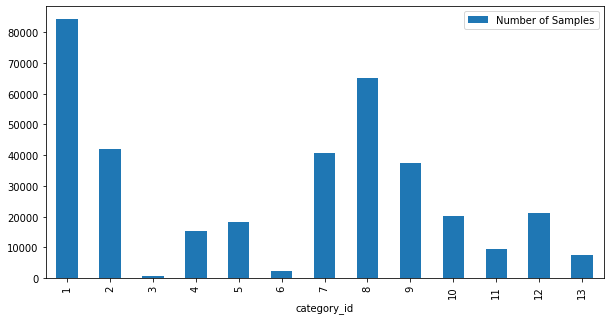

In [5]:
plot_num_samples_per_category(extended_df)

Seems reasonable to stick to "category_id = 1" for the time being...

In [6]:
df_cat1 = extended_df[extended_df["category_id"]==1]

## Number of images per pair_id

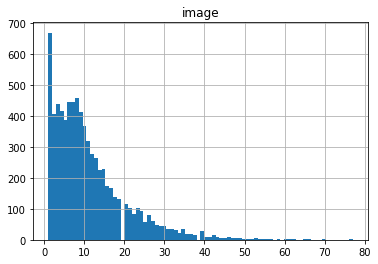

In [7]:
df_cat1.groupby(by="pair_id").count().hist("image", bins=80);

Maybe a cutoff of 10 images per pair_id might be plausible. But first we need to check the style thing...

### Exploring Styles

In [8]:
df_cat1["pair_style_zip"] = list(zip(df_cat1["pair_id"], df_cat1["style"]))

<ipython-input-8-73425a2eefca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat1["pair_style_zip"] = list(zip(df_cat1["pair_id"], df_cat1["style"]))


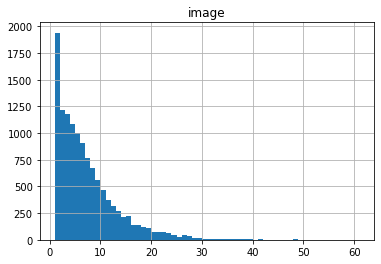

In [9]:
df_cat1.groupby(by="pair_style_zip").count().hist("image",bins=60);

How do pair_id+style groups look like?

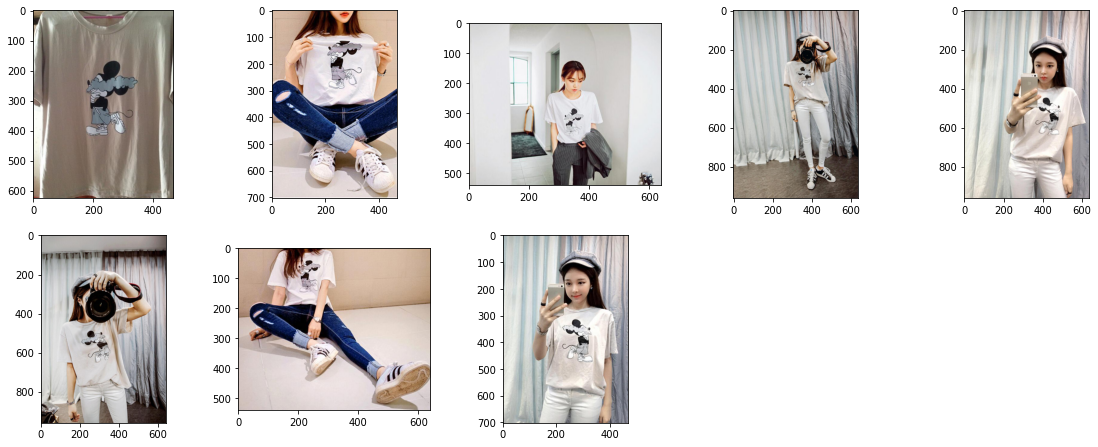

In [12]:
plt.figure(figsize=(20,20))
for i, img in enumerate(df_cat1[df_cat1["pair_id"]==21]["image"]):
    plt.subplot(5,5,i+1)
    img = plt.imread(img)
    plt.imshow(img)

In [17]:
unique_pair_id_with_multiple_items = df_cat1[df_cat1["single_item"]==False]["pair_id"].unique()

In [36]:
import random

Pair ID: 42


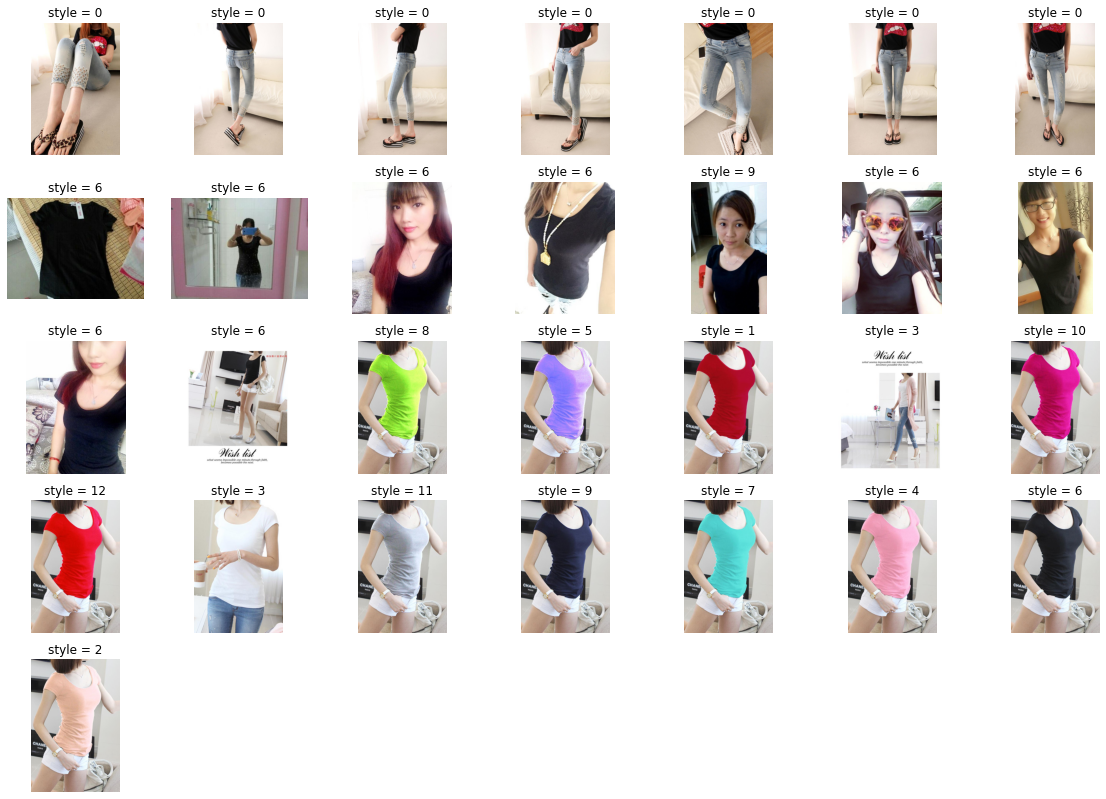

In [100]:
pair_id = random.choice(unique_pair_id_with_multiple_items)
pair_id = 42
plt.figure(figsize=(20,20))
print(f"Pair ID: {pair_id}")
for i, (_, row) in enumerate(df_cat1[df_cat1["pair_id"]==pair_id].iterrows()):
    if i < 49:
        plt.subplot(7,7,i+1)
        img = plt.imread(row["image"])
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"style = {row['style']}")
    

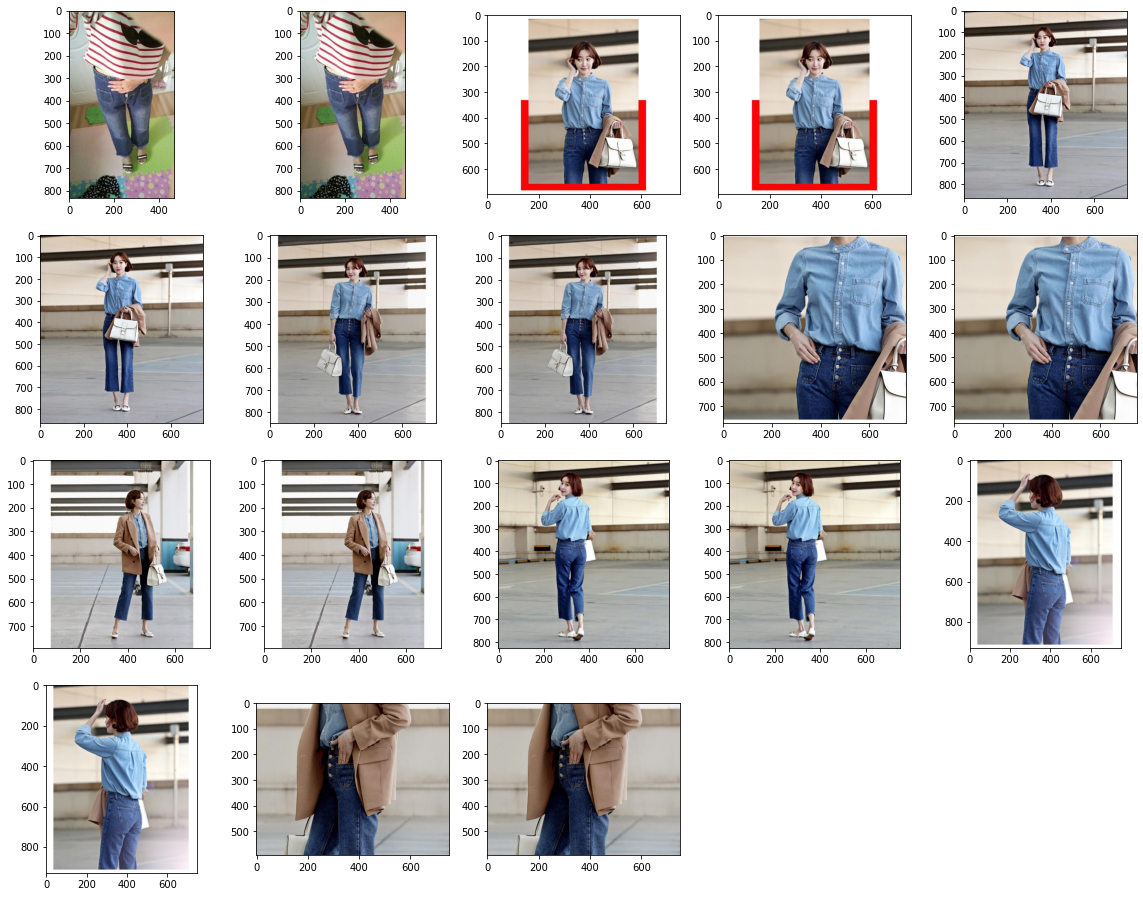

In [58]:
plt.figure(figsize=(20,20))
for i, img in enumerate(df[df["pair_id"]==10995]["image"]):
    plt.subplot(5,5,i+1)
    img = plt.imread(img)
    plt.imshow(img)

In [56]:
import json

In [125]:
path = df_cat1[df_cat1["pair_id"]==9049]["image"].values[0].replace("image", "annos").replace(".jpg",".json")
with open(path, "r") as file:
    tmp_dict = json.load(file)
    for key in tmp_dict.keys():
        if str(key).startswith("item"):
            print(key, tmp_dict[key]["style"], tmp_dict[key]["category_name"])

item2 1 short sleeve top
item1 0 sling dress


In [96]:
extended_df[extended_df["pair_id"] == 6713]

,segmentation,scale,viewpoint,zoom_in,landmarks,style,bounding_box,category_id,occlusion,category_name,image,pair_id,source,single_item
138293,"[[240.51, 204.37, 220.72, 173.14, 210.92, 151....",3,3,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 363, 331,...",1,"[0, 135, 407, 623]",8,1,trousers,/home/sascha/Documents/Projects/fashion_one_sh...,6713,user,True
138294,"[[420, 321, 356, 317, 277, 318, 278, 426, 287,...",2,2,1,"[277, 318, 1, 356, 317, 1, 420, 321, 1, 278, 4...",2,"[270, 315, 468, 676]",8,2,trousers,/home/sascha/Documents/Projects/fashion_one_sh...,6713,shop,False
138295,"[[368, 144, 358, 152, 338, 160, 314, 154, 304,...",2,2,1,"[332, 145, 1, 304, 147, 2, 314, 154, 2, 338, 1...",0,"[186, 143, 444, 383]",1,2,short sleeve top,/home/sascha/Documents/Projects/fashion_one_sh...,6713,shop,False
138296,"[[477, 359, 416, 357, 345, 357, 337, 447, 340,...",1,2,1,"[345, 357, 1, 416, 357, 1, 477, 359, 1, 337, 4...",2,"[335, 353, 491, 671]",8,2,trousers,/home/sascha/Documents/Projects/fashion_one_sh...,6713,shop,False
138297,"[[440, 204, 430, 211, 409, 216, 389, 212, 381,...",1,2,1,"[411, 201, 1, 381, 204, 2, 389, 212, 2, 409, 2...",0,"[315, 201, 500, 412]",1,2,short sleeve top,/home/sascha/Documents/Projects/fashion_one_sh...,6713,shop,False
138298,"[[203, 6, 164, 12, 137, 1, 74, 55, 85, 153, 94...",2,2,2,"[0, 0, 0, 0, 0, 0, 164, 12, 2, 203, 6, 2, 0, 0...",0,"[66, 2, 482, 391]",1,2,short sleeve top,/home/sascha/Documents/Projects/fashion_one_sh...,6713,shop,False
138299,"[[447, 200, 366, 234, 264, 270, 318, 428, 397,...",2,2,1,"[264, 270, 1, 366, 234, 1, 447, 200, 1, 318, 4...",2,"[249, 194, 669, 689]",8,2,trousers,/home/sascha/Documents/Projects/fashion_one_sh...,6713,shop,False
138300,"[[482, 336, 422, 335, 357, 337, 353, 450, 353,...",1,2,1,"[357, 337, 1, 422, 335, 1, 482, 336, 1, 353, 4...",2,"[348, 333, 513, 666]",8,2,trousers,/home/sascha/Documents/Projects/fashion_one_sh...,6713,shop,False
138301,"[[452, 181, 445, 187, 429, 192, 405, 192, 395,...",1,2,1,"[421, 180, 1, 395, 184, 2, 405, 192, 2, 429, 1...",0,"[300, 181, 511, 399]",1,2,short sleeve top,/home/sascha/Documents/Projects/fashion_one_sh...,6713,shop,False
138302,"[[493, 318, 437, 315, 371, 323, 377, 425, 386,...",1,2,1,"[371, 323, 1, 437, 315, 1, 493, 318, 1, 377, 4...",2,"[367, 316, 512, 659]",8,2,trousers,/home/sascha/Documents/Projects/fashion_one_sh...,6713,shop,False


In [29]:
df_cat1[df_cat1["pair_id"]==pair_id]

,segmentation,scale,viewpoint,zoom_in,landmarks,style,bounding_box,category_id,occlusion,category_name,image,pair_id,source,single_item,pair_style_zip
1,"[[257, 35, 261, 89, 228, 123, 137, 103, 45, 91...",3,2,2,"[182, 54, 1, 45, 91, 1, 137, 103, 1, 228, 123,...",1,"[0, 29, 466, 622]",1,2,short sleeve top,/home/sascha/Documents/Projects/fashion_one_sh...,1,user,False,"(1, 1)"
2,"[[220.25, 187.55, 259.6, 177.6, 296.6, 158.6, ...",3,3,1,"[271, 172, 2, 313, 145, 2, 0, 0, 0, 0, 0, 0, 0...",2,"[165, 133, 466, 572]",1,2,short sleeve top,/home/sascha/Documents/Projects/fashion_one_sh...,1,shop,False,"(1, 2)"
3,"[[145.21, 314.0, 162.67, 312.8, 175.12, 313.05...",3,2,2,"[127, 335, 1, 73, 340, 1, 107, 354, 1, 140, 35...",1,"[1, 300, 367, 701]",1,2,short sleeve top,/home/sascha/Documents/Projects/fashion_one_sh...,1,shop,False,"(1, 1)"


In [38]:
random.choice(unique_pair_id_with_multiple_items)

9188

In [68]:
(df_cat1[df_cat1["single_item"]==True]["style"] > 0).unique()

array([ True, False])

In [79]:
df_cat1[df_cat1["single_item"]==False].groupby(by="style").count()

,segmentation,scale,viewpoint,zoom_in,landmarks,bounding_box,category_id,occlusion,category_name,image,pair_id,source,single_item,pair_style_zip
style,,,,,,,,,,,,,,
0,25838,25838,25838,25838,25838,25838,25838,25838,25838,25838,25838,25838,25838,25838
1,29186,29186,29186,29186,29186,29186,29186,29186,29186,29186,29186,29186,29186,29186
2,8460,8460,8460,8460,8460,8460,8460,8460,8460,8460,8460,8460,8460,8460
3,4731,4731,4731,4731,4731,4731,4731,4731,4731,4731,4731,4731,4731,4731
4,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191
5,779,779,779,779,779,779,779,779,779,779,779,779,779,779
6,260,260,260,260,260,260,260,260,260,260,260,260,260,260
7,244,244,244,244,244,244,244,244,244,244,244,244,244,244
8,83,83,83,83,83,83,83,83,83,83,83,83,83,83


In [77]:
tmp = df_cat1[df_cat1["single_item"]==True]

In [78]:
tmp[tmp["pair_id"]==16]

,segmentation,scale,viewpoint,zoom_in,landmarks,style,bounding_box,category_id,occlusion,category_name,image,pair_id,source,single_item,pair_style_zip


In [104]:
unique_pair_id = df_cat1["pair_id"].unique()

look_at_me = []

for p in unique_pair_id:
    tmp_unique = df_cat1[df_cat1["pair_id"]==p]["style"].unique()
    if len(tmp_unique) > 1 and 0 in tmp_unique:
        look_at_me.append(p)
#     print(p, df_cat1[df_cat1["pair_id"]==p]["style"].unique())

In [117]:
tmp_cat1 = train_df[train_df["category_id"]==1]
unique_pair_id = tmp_cat1["pair_id"].unique()

look_at_me = []

for p in unique_pair_id:
    tmp_unique = tmp_cat1[tmp_cat1["pair_id"]==p]["style"].unique()
    print(p, tmp_unique)
    if len(tmp_unique) > 1 and 0 in tmp_unique:
        look_at_me.append(p)

1 [1 2]
4 [1]
5 [0]
6 [1]
7 [2 1]
8 [1]
11 [1]
12 [0]
13 [1 3]
15 [0]
18 [0 1]
24 [1]
26 [0]
29 [1 2]
30 [1 2]
31 [0]
33 [1]
35 [0]
42 [0]
43 [0]
46 [0]
49 [1]
50 [1]
51 [0]
53 [0]
58 [0]
62 [1]
67 [2 1]
70 [2 1]
75 [3 1]
81 [0]
82 [1]
85 [1]
88 [0]
90 [1]
91 [0]
92 [1 2 0]
95 [1 2]
96 [0]
102 [2 1]
103 [2 1 0]
104 [0]
106 [1]
111 [0]
112 [1 2]
116 [0]
118 [0]
119 [0]
120 [0]
121 [1]
122 [0]
123 [2 1 3]
126 [2 1]
129 [0]
130 [1]
131 [1]
132 [1]
133 [0]
136 [1 3]
137 [1]
139 [1 2]
140 [0]
142 [0]
147 [0]
148 [0]
150 [1]
151 [1 2]
152 [1 2 0]
153 [3 0 2 1]
157 [0]
161 [0]
164 [0 2]
170 [0]
171 [2 1]
176 [0]
183 [0]
186 [0]
187 [3 1]
188 [0]
192 [0]
194 [1]
195 [1 2]
203 [0]
206 [1]
208 [0]
210 [1]
211 [0]
213 [1]
214 [0]
220 [1 2]
221 [0]
223 [1]
224 [1 0 2]
227 [1]
230 [0]
231 [1]
233 [0]
235 [1]
236 [0]
239 [1 2]
241 [0]
243 [3 1]
246 [0]
251 [1 0]
253 [1]
255 [3 1]
258 [0]
259 [0]
261 [2]
264 [2 1]
270 [1]
271 [0]
275 [1]
276 [1 3]
278 [1]
280 [0]
283 [0]
285 [0]
288 [0]
293 [3 2 1]
2

1959 [0]
1960 [1]
1961 [1]
1964 [0]
1965 [0]
1966 [1]
1967 [1]
1968 [1]
1969 [0]
1975 [0]
1977 [0]
1979 [0]
1980 [1 2]
1985 [0]
1989 [1 3]
1990 [1]
1992 [1]
1995 [2 3 1 4]
1996 [1]
1998 [1 2]
1999 [0]
2004 [1]
2006 [0]
2007 [0]
2008 [1]
2010 [1]
2012 [0]
2015 [1 2]
2016 [0]
2017 [3 4 1 2]
2019 [0]
2020 [0]
2021 [0]
2022 [0]
2024 [1]
2025 [0]
2026 [2 1]
2028 [0]
2029 [1]
2032 [3 1 2]
2034 [0]
2035 [0]
2036 [0]
2037 [2 0]
2039 [0]
2041 [2 1]
2042 [0]
2043 [1 2]
2044 [1]
2045 [1]
2047 [0]
2048 [1 3 2]
2049 [1]
2056 [ 6  1  9 11  3 10  4  2 12  5  8  7]
2057 [0]
2058 [0]
2060 [0]
2065 [0]
2067 [0]
2069 [1]
2071 [2 1]
2072 [1]
2076 [1 2]
2077 [1 2]
2078 [1 2]
2080 [0]
2082 [1]
2084 [1 2 4 3]
2085 [0]
2087 [2 1]
2089 [1]
2090 [0]
2091 [1]
2092 [2 1]
2096 [1 2]
2104 [1 2]
2105 [0]
2106 [1 2]
2107 [2 1]
2108 [0]
2110 [0]
2112 [0]
2118 [1]
2121 [1]
2128 [1]
2130 [3 2 1]
2131 [1 2]
2136 [2 1 3 4 6 7 5]
2137 [3 1]
2139 [2 1]
2142 [1]
2143 [0]
2145 [1]
2147 [1]
2150 [4 3 1 2 0]
2151 [0]
2152 [2 1]

3867 [1]
3868 [2 1]
3869 [0]
3874 [0]
3877 [3 1 2]
3879 [0]
3881 [0]
3884 [1]
3885 [0 1 3]
3886 [0]
3888 [3 1 4 2]
3889 [0]
3892 [0]
3894 [0 2 4 1 3 5]
3896 [0]
3900 [0]
3906 [2 1]
3907 [3 2 1 4]
3908 [0]
3909 [0]
3910 [0]
3911 [0]
3912 [1]
3914 [0]
3915 [1]
3916 [1]
3917 [1]
3918 [2 3 1 4]
3920 [2 1]
3921 [1 2]
3922 [2 1 3]
3925 [0]
3926 [1 4 3 0]
3932 [2 1]
3936 [1 2]
3940 [0]
3942 [2 1]
3947 [0]
3948 [0]
3949 [0]
3950 [1]
3952 [2 1 3]
3954 [0]
3958 [5 7 3 1]
3962 [0]
3963 [2 1]
3964 [0]
3965 [0]
3966 [0]
3971 [1 3 2 4]
3973 [0]
3975 [0]
3977 [0]
3978 [0]
3980 [1]
3981 [0]
3983 [0 1 2 3]
3984 [27 33  0  1 12 15 32 22 26 13 11 21 17 16 25  3 23  8 30 24  4  5  2 10
 28 19  6 14  7 20 31 18  9 29]
3985 [1]
3986 [0]
3987 [0]
3988 [0]
3989 [3 1]
3991 [0]
3992 [0]
3993 [1 2]
3994 [1 4]
3995 [2 1]
3997 [1 3 2]
4003 [0]
4004 [0]
4006 [2 1]
4008 [1]
4009 [2 3]
4011 [3 1 5]
4014 [1]
4016 [0]
4018 [0]
4019 [0]
4020 [0]
4021 [0]
4022 [0]
4023 [0]
4026 [2 1 3]
4027 [0]
4028 [0]
4030 [0]
4035 [0]

5587 [0]
5588 [0]
5591 [0]
5599 [0]
5601 [1]
5602 [0]
5606 [1 0]
5608 [0]
5611 [1]
5612 [1]
5614 [2 1 0 3]
5615 [5 3 1 4]
5616 [0]
5620 [1]
5622 [3 2 1]
5623 [1 0]
5626 [0]
5627 [2 1]
5629 [0]
5631 [2 1]
5633 [0 2]
5635 [1 3 5]
5640 [0]
5641 [3 1]
5642 [2 1]
5645 [1]
5649 [0]
5650 [1 2]
5651 [0]
5654 [2 4 3 1]
5655 [0]
5658 [1]
5662 [0]
5665 [0]
5669 [2 3 1]
5673 [1]
5675 [0]
5676 [0]
5678 [0]
5682 [2 1]
5684 [1]
5685 [0]
5687 [0]
5693 [1]
5694 [2 1]
5696 [0]
5697 [0]
5699 [0]
5704 [1]
5705 [1]
5706 [1]
5708 [0]
5711 [0]
5714 [3 2 1]
5716 [0]
5721 [1 2]
5722 [1 3]
5723 [1]
5728 [3 4]
5729 [0]
5730 [1]
5731 [0]
5733 [1]
5734 [1]
5736 [1]
5744 [0]
5747 [0]
5753 [2 1]
5755 [1 2 4 5 3]
5757 [0]
5758 [1 3]
5760 [0]
5762 [0]
5765 [0]
5767 [3 2 1]
5768 [0]
5776 [0]
5779 [0]
5781 [1]
5782 [0]
5783 [1 4 5 2 3]
5784 [1]
5785 [0]
5786 [0]
5791 [0]
5792 [1 2]
5793 [0]
5794 [2 3 1]
5795 [1 3 2]
5802 [1 3]
5803 [0]
5804 [1 2]
5805 [0]
5807 [0 2]
5808 [1]
5810 [0]
5812 [1 2 3]
5813 [0]
5819 [1]
5820 

7425 [0]
7426 [0]
7427 [0]
7428 [0]
7429 [1]
7433 [1]
7434 [1 3 2 4]
7436 [1]
7437 [0]
7439 [0]
7441 [1]
7445 [1]
7446 [0]
7451 [ 6  4  1  2  7 17  3 12 15 16  9  5 11 13 10 14  8]
7452 [0]
7453 [2 1]
7454 [0]
7457 [0]
7458 [1]
7459 [0]
7461 [1 3]
7463 [1]
7464 [2 1]
7468 [1]
7471 [0]
7472 [0]
7473 [0]
7476 [1]
7477 [1 3]
7478 [5 4 1 3 2]
7480 [1]
7485 [0]
7486 [1 3]
7487 [1]
7488 [1 2]
7489 [0]
7490 [2 1]
7491 [1]
7492 [2 4 3 1]
7494 [0]
7498 [0]
7501 [0]
7503 [0]
7505 [1 3 2]
7507 [1 2 3]
7509 [1]
7512 [0]
7513 [1]
7516 [0]
7517 [2 1]
7518 [3 1]
7519 [2 1 3 4]
7523 [1]
7525 [1]
7528 [0]
7531 [1 3]
7533 [0]
7534 [3 5 1]
7535 [0]
7537 [1 2 0]
7539 [1 2]
7541 [1]
7543 [1]
7544 [0]
7545 [0]
7546 [0]
7547 [1 3]
7549 [1 2]
7553 [0]
7557 [1]
7558 [1]
7559 [2 4 3 1]
7564 [1 2]
7565 [0]
7566 [1]
7567 [3 1]
7568 [1 2]
7569 [0]
7571 [0]
7573 [1]
7574 [1 0]
7576 [0]
7577 [0]
7578 [1 2]
7581 [1]
7584 [2 3]
7587 [0]
7588 [0]
7594 [1]
7596 [0]
7606 [1]
7609 [0]
7611 [1]
7614 [3 1]
7621 [1 2]
7622 [

9391 [0]
9393 [3 1]
9394 [1]
9398 [1]
9400 [2 3 1]
9401 [1 0]
9402 [0]
9405 [0]
9406 [0]
9409 [1 2]
9411 [0]
9412 [4 0 2 1 3]
9415 [0]
9416 [0]
9417 [0]
9419 [0]
9425 [0]
9427 [1 2]
9428 [0]
9429 [0]
9430 [3 5 2 6 4 1]
9433 [1]
9434 [1]
9438 [1]
9440 [0]
9444 [0]
9445 [0]
9447 [4 3 1 2]
9450 [2 1 3]
9451 [0]
9454 [0]
9457 [1]
9460 [0]
9461 [2 3 1]
9462 [1]
9463 [0]
9464 [1 2]
9470 [2 1]
9474 [0]
9475 [3 1 2]
9476 [0]
9480 [1]
9484 [0]
9486 [1]
9488 [3 4 1 0]
9489 [1]
9490 [0]
9491 [1]
9493 [1]
9496 [0]
9500 [1]
9501 [2 1]
9504 [1 2]
9514 [2]
9517 [0]
9518 [1 0 2]
9520 [0]
9521 [1]
9522 [0]
9524 [1]
9527 [2 1 3 0]
9528 [0]
9533 [0]
9534 [1 2 3]
9537 [3 1 4 5 2]
9539 [0]
9540 [2 1 3]
9545 [0]
9546 [1]
9549 [1 3]
9551 [0]
9553 [1]
9558 [5 6 2 3 1 4]
9559 [0]
9564 [1 2]
9566 [1]
9567 [0]
9569 [0]
9571 [0]
9574 [0]
9579 [0]
9580 [5 3 1]
9589 [1]
9595 [0]
9596 [1]
9599 [0]
9604 [1 2]
9610 [0]
9613 [0]
9614 [2 1 4 3]
9616 [2 1]
9620 [0]
9623 [1]
9624 [1]
9625 [0]
9627 [1 2]
9629 [0]
9632 [0]


11362 [1 2]
11363 [0]
11364 [0]
11366 [1]
11368 [0]
11369 [1 2]
11370 [1]
11371 [1 2]
11373 [1 2 3 4]
11375 [0]
11377 [0]
11378 [0]
11379 [1 2]
11380 [0]
11381 [1]
11383 [1]
11386 [1 2]
11387 [0]
11388 [3 6 4 5 1 2]
11390 [0]
11391 [2 1]
11392 [1]
11395 [0]
11398 [1]
11399 [1]
11401 [1]
11402 [0]
11403 [0]
11404 [3 1 2]
11405 [1]
11406 [1]
11407 [0]
11410 [0]
11413 [2 1]
11414 [1]
11416 [1]
11417 [1]
11418 [0]
11419 [0]
11429 [0]
11430 [0]
11432 [0]
11434 [1]
11436 [0]
11439 [0]
11441 [0]
11442 [1]
11443 [1]
11444 [0]
11445 [2 1]
11449 [1]
11451 [3 2 1]
11454 [0]
11455 [0]
11456 [1 3 2]
11457 [1]
11459 [1]
11461 [0]
11464 [2 1]
11465 [3 1 6 5]
11466 [0]
11468 [1 2]
11471 [0]
11472 [0]
11473 [0]
11476 [0]
11477 [0]
11478 [1]
11480 [1 2]
11481 [1]
11483 [3 1 2]
11486 [0]
11487 [1]
11488 [0]
11490 [0]
11492 [0]
11494 [1 3 7 5]
11496 [1]
11497 [0]
11501 [0]
11504 [1 2]
11507 [1 6 4]
11508 [1 2]
11510 [0]
11511 [1 3]
11512 [0]
11514 [0]
11515 [1 0]
11516 [1]
11517 [2 1]
11519 [0]
11522 [0]


13245 [1 2]
13251 [1]
13252 [1]
13254 [1 3 2]
13256 [1]
13263 [0]
13266 [0]
13269 [1 3]
13272 [0]
13274 [0]
13275 [3 5 1]
13276 [1]
13278 [0]
13279 [1]
13280 [4 2 3 5 1]
13283 [0]
13289 [1]
13291 [0]
13295 [0]
13300 [3 2 1]
13301 [0]
13302 [1 2]
13305 [2 1 0]
13306 [0]
13308 [0]
13310 [0]
13312 [0]
13313 [0]
13314 [0]
13315 [1]
13316 [0]
13318 [1]
13319 [0]
13321 [1]
13323 [0]
13326 [0]
13328 [3 1]
13331 [1]
13332 [0]
13334 [2 3 1]
13338 [0]
13340 [1 2 3]
13341 [0]
13344 [4 2 5 3 1]
13348 [1]
13349 [1 2 3]
13350 [0]
13351 [0]
13352 [1 2 3 4]
13358 [0]
13359 [1]
13360 [0]
13362 [0]
13364 [1 2]
13367 [1 0]
13369 [0]
13371 [1]
13373 [2 1]
13375 [0]
13377 [0]
13379 [1 0]
13380 [0]
13381 [0]
13386 [1 2 3]
13387 [1]
13388 [3 5 1]
13390 [0]
13392 [1 4 5]
13394 [2 4 3 1]
13396 [0]
13397 [0]
13398 [3 1 5]
13399 [0]
13403 [0]
13407 [0]
13408 [1]
13409 [1]
13412 [0]
13414 [1 2 3]
13417 [3 1]
13420 [ 6  3  2  4  1  5 13  9  8 11 12 10 14  7]
13422 [1]
13423 [0]
13424 [0]
13426 [1]
13427 [0]
13432 

14887 [0]
14889 [1]
14891 [0]
14892 [0]
14893 [0]
14897 [0]
14899 [0]
14901 [1 2]
14902 [0]
14903 [1]
14904 [2 1]
14910 [0]
14914 [0]
14917 [1 2 3]
14918 [0]
14922 [2 1]
14923 [1 0]
14924 [1 3 2]
14925 [0]
14926 [0]
14929 [1]
14930 [0]
14932 [2 1]
14933 [2 1 3 5 4]
14934 [0]
14935 [2]
14936 [0]
14939 [0]
14940 [0]
14942 [0]
14944 [2 1]
14946 [2 1]
14947 [0]
14948 [2 1]
14949 [0]
14950 [0]
14951 [1]
14952 [1 0]
14954 [0]
14956 [0]
14957 [1]
14958 [0]
14960 [0]
14963 [0]
14965 [1]
14966 [3 2 1]
14969 [1 2]
14971 [0]
14972 [1 2]
14973 [2 3 1]
14974 [1]
14975 [0]
14977 [1]
14978 [0]
14979 [0]
14981 [0]
14982 [0]
14983 [0]
14984 [0]
14988 [0]
14992 [1]
14993 [2 1]
14994 [1 2]
14995 [1]
14997 [0]
14998 [3 1 4 2]
15001 [0 1]
15002 [1]
15006 [1]
15008 [1]
15010 [1]
15012 [0]
15014 [2 1]
15018 [1 0]
15020 [0]
15022 [0]
15026 [1 4 3 2]
15027 [2 1 3]
15029 [0]
15032 [1]
15035 [0]
15036 [2]
15039 [1]
15041 [0]
15048 [2 0 1]
15049 [1 0 2]
15050 [0]
15054 [0]
15055 [0]
15058 [0]
15059 [1]
15060 [0]


Pair ID: 9049


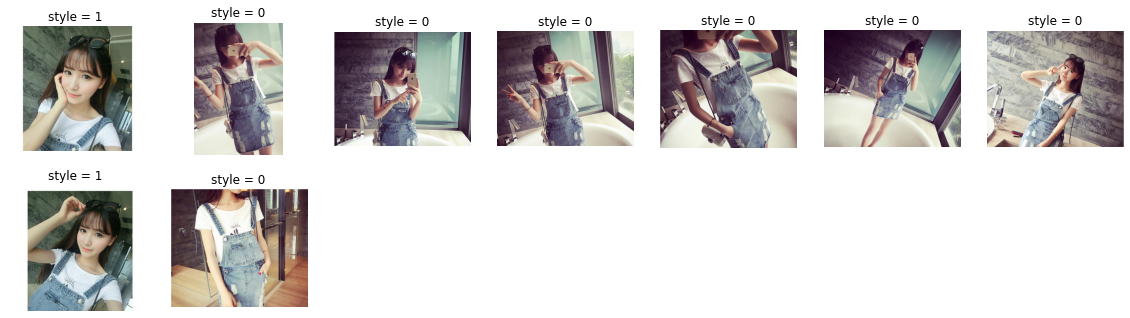

In [123]:
pair_id = random.choice(look_at_me)
# pair_id = 4
plt.figure(figsize=(20,20))
print(f"Pair ID: {pair_id}")
for i, (_, row) in enumerate(tmp_cat1[tmp_cat1["pair_id"]==pair_id].iterrows()):
    if i < 49:
        plt.subplot(7,7,i+1)
        img = plt.imread(row["image"])
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"style = {row['style']}")
    

In [108]:
train_df["pair_id"].unique()

array([    1,     2,     3, ..., 15080, 15081, 15082])

In [112]:
for p in validation_df[validation_df["category_id"]==1]["pair_id"].unique():
    if p in train_df[train_df["category_id"]==1]["pair_id"].unique():
        print(p)

4
6
8
29
31
33
42
46
49
53
58
82
85
91
92
102
106
112
119
122
123
126
129
132
136
142
147
150
157
161
164
170
176
188
194
195
211
214
220
221
223
231
236
241
259
264
276
280
288
293
305
315
316
320
322
332
339
342
345
357
362
366
367
369
377
379
382
386
388
392
399
411
416
418
421
429
430
433
434
439
445
453
456
458
472
475
476
481
488
498
500
505
507
554
555
566
571
574
591
592
593
595
597
603
620
629
638
650
652
656
658
660
661
663
667
670
672
676
677
687
694
695
696
697
706
713
714
715
716
731
739
776
777
781
791
794
803
805
808
809
816
826
831
835
837
855
857
858
861
862
865
867
869
871
878
883
888
890
895
909
921
937
943
946
947
955
956
977
978
982
983
985
989
995
998
999
1006
1011
1015
1017
1020
1021
1033
1044
1045
1050
1051
1052
1054
1056
1069
1071
1072
1074
1077
1094
1097
1110
1111
1114
1115
1121
1122
1130
1131
1132
1133
1148
1160
1165
1171
1173
1185
1186
1195
1198
1201
1203
1213
1223
1230
1233
1240
1242
1258
1270
1273
1277
1279
1280
1282
1283
1289
1298
1307
1315
1318
1320
1322

array([[<AxesSubplot:title={'center':'image'}>]], dtype=object)

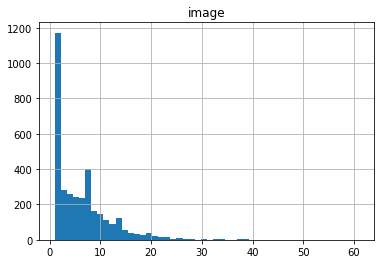

In [130]:
tmp_cat1[tmp_cat1["style"]==0].groupby(by="pair_id").count().hist("image", bins=50)

In [132]:
len(tmp_cat1[tmp_cat1["style"]==0]), len(tmp_cat1[tmp_cat1["style"]!=0])

(22016, 49629)